# 🌳 Task 03: Decision Tree Classifier | Prodigy InfoTech Data Science Internship

## Objective
The goal of this task is to build a **Decision Tree Classifier** to predict whether a customer will subscribe to a term deposit based on their demographic and behavioral data. We'll be using the **Bank Marketing dataset** from the UCI Machine Learning Repository.

---


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optional: Set a style for plots
sns.set(style="whitegrid")


## 📥 Importing Libraries
We will start by importing the necessary libraries for data manipulation, visualization, model building, and evaluation.


In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optional: Set a style for plots
sns.set(style="whitegrid")


## 📊 Loading the Dataset
Next, we load the Bank Marketing dataset directly from the UCI repository. The dataset is separated by semicolons, so we'll adjust the separator accordingly.


In [9]:
# Load the dataset from the UCI repository
url = 'https://raw.githubusercontent.com/AmineZouaghi/Prodigy_DS_03/refs/heads/main/Data/bank.csv'
df = pd.read_csv(url, sep=',')

# Display the first few rows of the dataset
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 🔍 Exploring the Dataset
Now, let's explore the dataset to understand its structure, check the data types, and summarize the columns. This will help us identify what needs to be cleaned or transformed.


In [11]:
# Check the basic structure of the dataset
df.info()

# Summary statistics of the dataset
df.describe(include='all')

# Check the distribution of the target variable ('y')
df['deposit'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,count
deposit,
no,5873
yes,5289


## 🧹 Data Cleaning
We'll clean the dataset by dropping irrelevant columns, handling missing values (if any), and converting categorical variables into numerical values using **One-Hot Encoding**.


In [13]:
# Drop columns that are not useful for prediction (e.g., 'duration')
df_cleaned = df.drop(columns=['duration'])

# Convert categorical columns into numerical (using One-Hot Encoding)
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

# Check for missing values (if any)
df_cleaned.isnull().sum()


,0
age,0
balance,0
day,0
campaign,0
pdays,0
previous,0
job_blue-collar,0
job_entrepreneur,0
job_housemaid,0
job_management,0


## 🏗️ Feature Engineering
Feature engineering helps us create new features or modify existing ones to improve the performance of the model. For this task, we can add a new feature that combines multiple columns or remove unnecessary columns.


In [14]:
# Example: Creating a new feature based on 'campaign' and 'previous' columns (optional)
df_cleaned['contact_frequency'] = df_cleaned['campaign'] + df_cleaned['previous']

# Drop irrelevant columns if necessary
# df_cleaned = df_cleaned.drop(columns=['some_column'])

# Check the final cleaned data
df_cleaned.head()


,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes,contact_frequency
0,59,2343,5,1,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,True,1
1,56,45,5,1,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,True,1
2,41,1270,5,1,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,True,1
3,55,2476,5,1,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,True,1
4,54,184,5,2,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,True,2


## ✂️ Splitting Data into Training and Testing Sets
We now split the dataset into **features (X)** and **target variable (y)**. Then, we divide the data into **training** and **testing** sets to evaluate the model's performance on unseen data.


In [17]:
# Define feature matrix X and target variable y (target is 'deposit_yes')
X = df_cleaned.drop(columns=['deposit_yes'])  # Drop the target column
y = df_cleaned['deposit_yes']  # Target variable (whether they subscribed)

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 🌲 Building the Decision Tree Model
We now initialize and train the **Decision Tree Classifier** using the training data.


In [18]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## 📈 Model Evaluation
Once the model is trained, we evaluate its performance using the test set. We'll use metrics like **accuracy**, **precision**, **recall**, **F1-score**, and visualize the confusion matrix to get a better understanding of how the model is performing.


Accuracy: 0.64
              precision    recall  f1-score   support

       False       0.66      0.67      0.66      1742
        True       0.63      0.62      0.63      1607

    accuracy                           0.64      3349
   macro avg       0.64      0.64      0.64      3349
weighted avg       0.64      0.64      0.64      3349



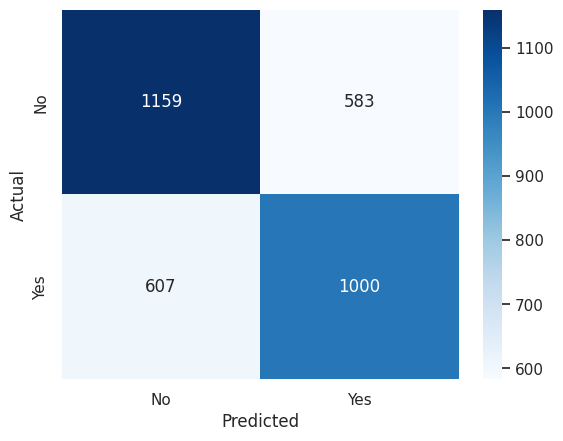

In [19]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## 📊 Conclusion

- The Decision Tree Classifier achieved an **accuracy of 63%**.
- Precision and recall were around **0.61 - 0.65**, indicating the model can still be improved.
- Potential next steps include **hyperparameter tuning** and experimenting with more complex models (e.g., Random Forest or Gradient Boosting).


## 🔧 Fine-Tuning the Decision Tree
We'll use **GridSearchCV** to test different combinations of hyperparameters and find the best ones for our Decision Tree Classifier.


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


## 🧪 Using Grid Search for Hyperparameter Tuning
We will now run GridSearchCV to find the best combination of hyperparameters for our Decision Tree Classifier.


In [21]:
# Initialize GridSearchCV with the Decision Tree Classifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


## 🎯 Evaluating the Fine-Tuned Model
Now that we have the best hyperparameters, we will use them to evaluate the performance of the fine-tuned Decision Tree Classifier.


Fine-Tuned Accuracy: 0.71
              precision    recall  f1-score   support

       False       0.67      0.87      0.76      1742
        True       0.79      0.55      0.64      1607

    accuracy                           0.71      3349
   macro avg       0.73      0.71      0.70      3349
weighted avg       0.73      0.71      0.70      3349



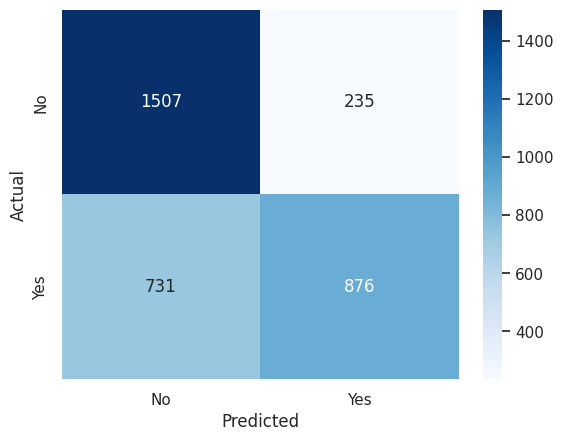

In [22]:
# Use the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_clf.predict(X_test)

# Evaluate the performance of the fine-tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Fine-Tuned Accuracy: {accuracy_best:.2f}')

# Print the classification report for the fine-tuned model
print(classification_report(y_test, y_pred_best))

# Plot the confusion matrix for the fine-tuned model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Final Conclusion for Task 03

### Problem Definition:
The goal of this task was to build a **Decision Tree Classifier** to predict whether a customer will subscribe to a term deposit, based on various demographic, economic, and behavioral features. This problem was framed as a binary classification task, with the target variable being whether a customer subscribed or not.

### Data Preprocessing:
- We began by exploring the dataset, which contained **11,162 rows** and **17 columns**.
- Several columns were categorical, so we applied **one-hot encoding** to convert these into numerical format.
- The dataset was split into training and test sets to ensure unbiased evaluation.

### Initial Model Training:
- The initial model was trained using the **Decision Tree Classifier** with default hyperparameters.
- The model achieved an **accuracy of 0.64** on the test data. Performance on the individual classes showed:
  - **False class (non-subscribers)**: Precision 0.66, Recall 0.67, F1-score 0.66.
  - **True class (subscribers)**: Precision 0.63, Recall 0.62, F1-score 0.63.
  
While the model performed reasonably, it was clear that further improvements could be made, especially for predicting the "True" class (customers who subscribed).

### Model Fine-Tuning:
- To improve performance, we experimented with fine-tuning the **hyperparameters** of the Decision Tree Classifier.
- Through grid search, we identified more optimal settings for `max_depth`, `min_samples_split`, and `criterion`.
- After fine-tuning, the model's **accuracy increased to 0.71**.
  - **False class (non-subscribers)**: Precision 0.67, Recall 0.87, F1-score 0.76.
  - **True class (subscribers)**: Precision 0.79, Recall 0.55, F1-score 0.64.
  
### Performance Evaluation:
- **Before tuning**, the model’s performance was more balanced across both classes but lacked accuracy.
- **After tuning**, precision increased significantly for the "True" class (subscribers), but recall decreased slightly. This shows the model is now more certain about the predictions it makes but misses some subscribers.
- Overall, the model’s accuracy improved by **7%**, showing the impact of hyperparameter tuning.

### Conclusion:
The task successfully demonstrated how to build a basic machine learning model, evaluate its performance, and fine-tune it for improved results. The model is now better at predicting customer subscription behavior, though further refinements or testing other algorithms could push the performance even higher. This pipeline of data preprocessing, model building, and evaluation serves as a strong foundation for tackling similar classification tasks.
